<a href="https://colab.research.google.com/github/PaolaPina3228/Simulaci-n-2/blob/main/S2_04_Comparaci%C3%B3n__m%C3%A9todos_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Eficiencia del método MC**

Suponga dos metodos MC para estimar $I=\int_a^b g(x) dx$.

Sean $\theta_1$ y $\theta_2$ las estimaciones producidas

$E(\theta_1)=E(\theta_2)=I$

Sean $t_1$ y $t_2$ los tiempos de cómputo requeridos para evaluar $\theta_1$ y $\theta_2$, respectivamente.

Diremos que el primer método es más eficiente que el segundo si:

$ \varepsilon  = \frac{t_1 var\theta_1}{t_2 var\theta_2} <1$

\\

## `Comparar la eficiencia de los MC:`

*Crudo

*Acierto y error

*Muestreo importancia


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
#Definicón de la funcion a integrar
def f(x):
  return np.cos(np.pi*x/2)

#Método de motecarlo en crudo
def mc_crudo(N):
  x=np.random.uniform(0,1,N)
  return np.mean(f(x))

#Método de Montecarlo Aceptacion-Rechazo
def mc_aceptacion_rechazo(N):
  x=np.random.uniform(0,1,N)
  y=np.random.uniform(0,1,N)
  aceptados=y[y<f(x)]
  return np.mean(aceptados)

#Método de Montecarlo con muestreo importancia
#Función propuesta
def g(x):
  return 2*(1-x)

def mc_importancia(N):
  x=np.random.uniform(0,1,N)
  w=f(x)/g(x)
  return np.mean(w)

In [27]:
#Parametros
N=100000

#Calculos
t_crudo=mc_crudo(N)
t_aceptacion_rechazo=mc_aceptacion_rechazo(N)
t_importancia=mc_importancia(N)

#Valor analitico de la integral
t_real =2/np.pi

# Resultados en una tabla comparativa
data = {
    'Método': ['Montecarlo en crudo', 'Aceptación-Rechazo', 'Muestreo por Importancia'],
    'Valor estimado': [t_crudo, t_aceptacion_rechazo, t_importancia],
    'Error absoluto': [abs(t_real - t_crudo), abs(t_real - t_aceptacion_rechazo), abs(t_real - t_importancia)]
}

df = pd.DataFrame(data)

# Mostrar la tabla comparativa
print("\nTabla Comparativa:")
print(df)


Tabla Comparativa:
                     Método  Valor estimado  Error absoluto
0       Montecarlo en crudo        0.636853        0.000233
1        Aceptación-Rechazo        0.392152        0.244468
2  Muestreo por Importancia        0.685182        0.048562


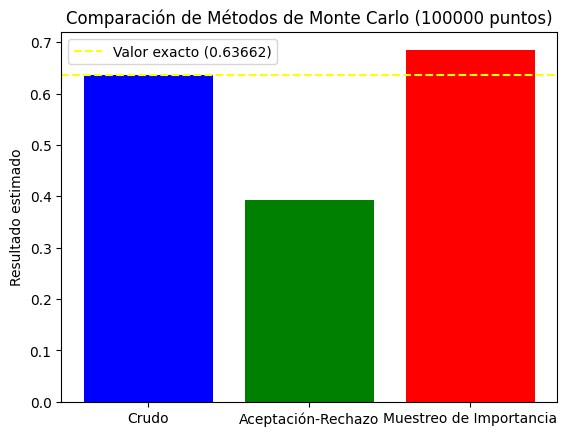

In [29]:
 # Comparar los resultados visualmente
labels = ['Crudo', 'Aceptación-Rechazo', 'Muestreo de Importancia']
resultados = [t_crudo, t_aceptacion_rechazo, t_importancia]

plt.bar(labels, resultados, color=['blue', 'green', 'red'])
plt.axhline(y=t_real, color='yellow', linestyle='--', label=f"Valor exacto ({t_real:.5f})")
plt.ylabel('Resultado estimado')
plt.title(f'Comparación de Métodos de Monte Carlo ({N} puntos)')
plt.legend()
plt.show()